In [9]:
import gc
import os
import sys
import cv2
import psutil
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
im_path = 'C:/Users/hamma/Desktop/Newcastle University/Data Science/Machine Learning/c0070933_hammad_mir_extended_technical_project/dataset/lesions/df'

In [7]:
psutil.virtual_memory()

svmem(total=8499593216, available=1315815424, percent=84.5, used=7183777792, free=1315815424)

In [6]:
psutil.virtual_memory().available * 100 / psutil.virtual_memory().total

14.950874561947977

In [12]:
im  = []
for i in os.listdir(im_path):
    im.append(cv2.imread(im_path + '/' + i))
y = to_categorical([3] * len(im), num_classes=7)

print('im_size: ' + str(sys.getsizeof(im)*1e-6) + ' MB')
print('y_size: ' + str(sys.getsizeof(y)*1e-6) + ' MB')

im_size: 0.001064 MB
y_size: 0.000112 MB


In [13]:
psutil.virtual_memory()

svmem(total=8499593216, available=1263779840, percent=85.1, used=7235813376, free=1263779840)

In [14]:
gc.collect()

272

In [15]:
psutil.virtual_memory()

svmem(total=8499593216, available=1286184960, percent=84.9, used=7213408256, free=1286184960)

image paths

In [18]:
path = 'C:/Users/hamma/Desktop/Newcastle University/Data Science/Machine Learning/c0070933_hammad_mir_extended_technical_project/dataset/lesions/'

classes = os.listdir(path)

def load_paths(path, classes):
  
  image_paths = []
  y = []
  
  for label, elem in enumerate(classes):

    print('class: ' + elem + ' | label: ' + str(label))
    path1 = path + '/' + elem
    images = os.listdir(path1)
    for im in images:
      image_paths.append(path1 + '/' + im)
      y.append(str(label))
  
  # shuffle
  c = list(zip(image_paths,y))
  np.random.shuffle(c)
  image_paths,y = zip(*c)
  
  return image_paths, to_categorical(y, num_classes=7)

image_paths, labels = load_paths(path, classes)

print('im_size: ' + str(sys.getsizeof(image_paths)*1e-6) + ' MB')
print('y_size: ' + str(sys.getsizeof(labels)*1e-6) + ' MB')

class: akiec | label: 0
class: bcc | label: 1
class: bkl | label: 2
class: df | label: 3
class: mel | label: 4
class: nv | label: 5
class: vasc | label: 6
im_size: 0.08016 MB
y_size: 0.000112 MB


In [ ]:
psutil.virtual_memory()

svmem(total=8499593216, available=1263779840, percent=85.1, used=7235813376, free=1263779840)

In [ ]:
gc.collect()

272

In [ ]:
psutil.virtual_memory()

svmem(total=8499593216, available=1286184960, percent=84.9, used=7213408256, free=1286184960)

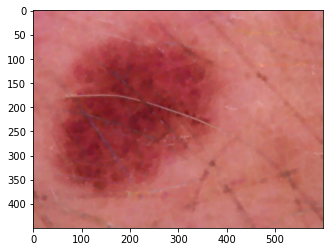

In [8]:
proc = restoration.inpaint.inpaint_biharmonic(im, b_tophat, channel_axis=-1)

plt.imshow(proc)

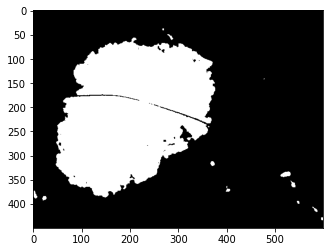

In [9]:
thresholds = filters.threshold_multiotsu(color.rgb2gray(proc), classes=2)
regions = np.digitize(color.rgb2gray(proc), bins=thresholds)
regions[regions>0] = 1
regions = invert(regions)

plt.imshow(regions, cmap='gray')

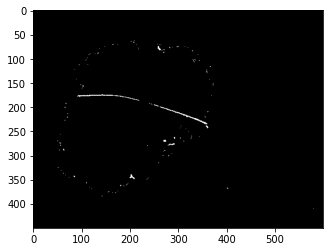

In [12]:
mask_b_tophat = morphology.black_tophat(regions, footprint=morphology.disk(2))

plt.imshow(mask_b_tophat, cmap='gray')

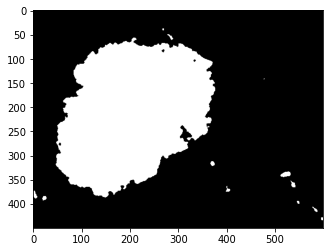

In [13]:
mask = restoration.inpaint.inpaint_biharmonic(regions, mask_b_tophat, channel_axis=None)

plt.imshow(mask, cmap='gray')

In [69]:
regions

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

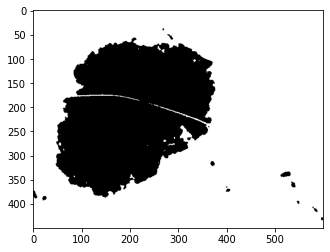

In [38]:
closed = morphology.closing(regions, morphology.square(2))
plt.imshow(closed, cmap='gray')

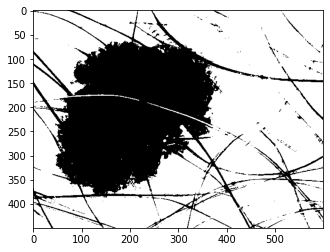

In [48]:
thresholds = filters.threshold_multiotsu(color.rgb2gray(im), classes=2)
regions = np.digitize(color.rgb2gray(im), bins=thresholds)
regions[regions>0] = 1

plt.imshow(regions, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


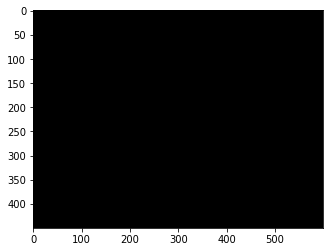

In [14]:
plt.imshow(im*mask.reshape((450, 600, 1)))

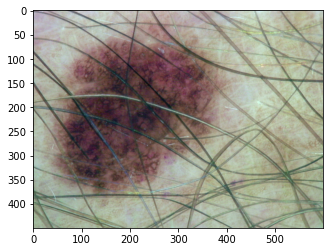

In [6]:
min_max = MinMaxScaler().fit_transform(im.reshape((-1, 3))).reshape(im.shape)
plt.imshow(min_max)

In [10]:
min_max.dtype

dtype('float64')

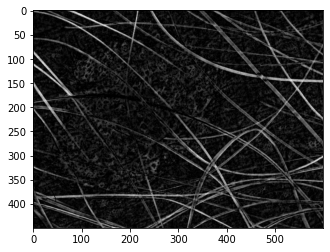

In [15]:
b_tophat2 = morphology.black_tophat(color.rgb2gray(min_max), footprint=morphology.disk(5))
plt.imshow(b_tophat2, cmap='gray')

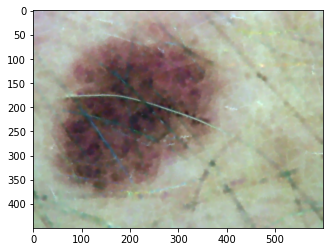

In [16]:
proc2 = restoration.inpaint.inpaint_biharmonic(min_max, b_tophat2, channel_axis=-1)

plt.imshow(proc2)

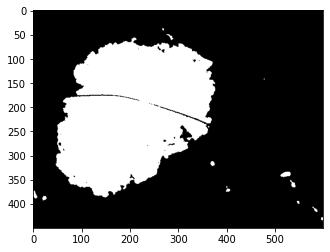

In [18]:
thresholds = filters.threshold_multiotsu(color.rgb2gray(proc2), classes=2)
regions = np.digitize(color.rgb2gray(proc2), bins=thresholds)
regions[regions>0] = 1
regions = invert(regions)

plt.imshow(regions, cmap='gray')

In [19]:
min_max

array([[[0.70552147, 0.65605096, 0.66459627],
        [0.70552147, 0.64968153, 0.67701863],
        [0.6993865 , 0.66242038, 0.68322981],
        ...,
        [0.76687117, 0.8089172 , 0.80124224],
        [0.7791411 , 0.81528662, 0.80745342],
        [0.80981595, 0.82165605, 0.8447205 ]],

       [[0.63190184, 0.5477707 , 0.58385093],
        [0.63803681, 0.5477707 , 0.59627329],
        [0.62576687, 0.56687898, 0.60248447],
        ...,
        [0.76687117, 0.81528662, 0.77639752],
        [0.76687117, 0.81528662, 0.77639752],
        [0.77300613, 0.8089172 , 0.77639752]],

       [[0.52147239, 0.45859873, 0.49068323],
        [0.52760736, 0.4522293 , 0.49689441],
        [0.51533742, 0.4522293 , 0.48447205],
        ...,
        [0.75460123, 0.80254777, 0.77639752],
        [0.74846626, 0.79617834, 0.75776398],
        [0.74846626, 0.79617834, 0.75776398]],

       ...,

       [[0.60736196, 0.6433121 , 0.58385093],
        [0.6196319 , 0.66878981, 0.59627329],
        [0.62576687, 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


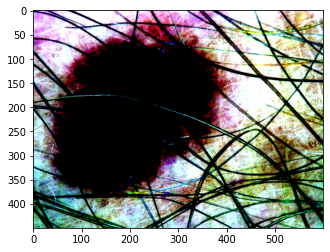

In [20]:
im_std = StandardScaler().fit_transform(im.reshape((-1, 3))).reshape(im.shape)
plt.imshow(im_std)

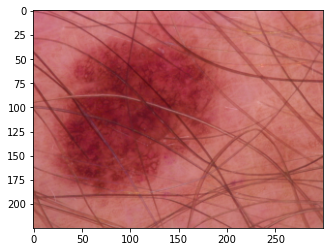

In [16]:
plt.imshow(transform.rescale(im, (0.5, 0.5, 1)))

Train Test Split

In [28]:
dataset_dir = 'C:/Users/hamma/Desktop/Newcastle University/Data Science/Machine Learning/c0070933_hammad_mir_extended_technical_project/dataset/lesions_split'
extract_dir = 'C:/Users/hamma/Desktop/Newcastle University/Data Science/Machine Learning/c0070933_hammad_mir_extended_technical_project/dataset'

In [24]:
import random
import shutil
# This function splits the image data into train and validation sets
def train_validation_split(dataset_path, output_path, split_ratio, seed=120):
    """Builds the train and validation image sets for all image categories given a split ratio"""
    img_categories = os.listdir(dataset_path)  # all the image categories
    if os.path.exists(output_path):
        print('Dataset already exists at the given path')
    else:
        os.makedirs(output_path)
        os.mkdir(output_path + '/train')
        os.mkdir(output_path + '/validation')

        # for every image category in the dataset build train and val folders with images in them a/c to split_ratio
        print('Splitting dataset into train and validation sets: ')
        for img_category in img_categories:
            print('.', end='')
            # list all the images for this category
            imgs = os.listdir(dataset_path + '/' + img_category)
            # sort and shuffle images randomly
            imgs.sort()
            random.seed(seed)
            random.shuffle(imgs)
            # split the imgs into two halves train and test
            train_split = imgs[:int(split_ratio * len(imgs))]
            test_split = imgs[int(split_ratio * len(imgs)):]

            # built the train set and copy images
            if not os.path.exists(os.path.join(output_path, 'train', img_category)):
                os.mkdir(os.path.join(output_path, 'train', img_category))
            for img in train_split:
                source = os.path.join(dataset_path, img_category, img)
                dest = os.path.join(output_path, 'train', img_category, img)
                shutil.copy(source, dest)

            # built the test set and copy images
            if not os.path.exists(os.path.join(output_path, 'validation', img_category)):
                os.mkdir(os.path.join(output_path, 'validation', img_category))
            for img in test_split:
                source = os.path.join(dataset_path, img_category, img)
                dest = os.path.join(output_path, 'validation', img_category, img)
                shutil.copy(source, dest)
        print('\nSuccess!!')

In [30]:
output_path = os.path.join(dataset_dir, 'items_train_val_set') # post split path
train_validation_split(dataset_dir, output_path, 0.80)
train_dir = os.path.join(output_path, 'train')
validation_dir = os.path.join(output_path, 'validation')
test_dir = os.path.join(dataset_dir, 'test')

Splitting dataset into train and validation sets: 
.......
Success!!


Augmentation

In [38]:
train_dir = 'C:/Users/hamma/Desktop/Newcastle University/Data Science/Machine Learning/c0070933_hammad_mir_extended_technical_project/dataset/lesions_split/train'

In [36]:
import Augmentor

In [39]:
p = Augmentor.Pipeline(train_dir)

Initialised with 8010 image(s) found.
Output directory set to C:/Users/hamma/Desktop/Newcastle University/Data Science/Machine Learning/c0070933_hammad_mir_extended_technical_project/dataset/lesions_split/train\output.

In [40]:
p.set_seed(7)

p.rotate(0.5, 25, 25)

p.flip_random(0.5)

p.shear(0.5, 10, 10)

p.zoom(probability=0.25, min_factor=1.1, max_factor=1.8)

In [41]:
p.status()

Operations: 4
	0: RotateRange (probability=0.5 max_left_rotation=-25 max_right_rotation=25 )
	1: Flip (probability=0.5 top_bottom_left_right=RANDOM )
	2: Shear (probability=0.5 max_shear_left=10 max_shear_right=10 )
	3: Zoom (probability=0.25 min_factor=1.1 max_factor=1.8 )
Images: 8010
Classes: 7
	Class index: 0 Class label: akiec 
	Class index: 1 Class label: bcc 
	Class index: 2 Class label: bkl 
	Class index: 3 Class label: df 
	Class index: 4 Class label: mel 
	Class index: 5 Class label: nv 
	Class index: 6 Class label: vasc 
Dimensions: 1
	Width: 600 Height: 450
Formats: 1
	 JPEG

You can remove operations using the appropriate index and the remove_operation(index) function.


In [42]:
p.sample(20000)

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22DA61B7250>: 100%|██████████| 20000/20000 [13:27<00:00, 24.77 Samples/s]                  
